In [1]:
!pip install -r requirements.txt

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Carico i dati

In [7]:
dataset = pd.read_csv('call_center.csv')
dataset

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
1,No,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
2,Yes,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
3,Yes,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
4,No,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Yes,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95
5630,No,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3
5631,No,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5632,Yes,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


In [8]:
for col in dataset.columns: #scorro tutte le colonne
    print("Colonna",col,":",dataset[col].unique())
    
dataset.info()

Colonna Churn : ['No' 'Yes']
Colonna customerID : ['4223-BKEOR' '6035-RIIOM' '3797-VTIDR' ... '8044-BGWPI' '7450-NWRTR'
 '4795-UXVCJ']
Colonna gender : ['Female' 'Male']
Colonna SeniorCitizen : [0 1]
Colonna Partner : ['No' 'Yes']
Colonna Dependents : ['Yes' 'No']
Colonna tenure : [21 54  1  4  0  7 32 72 19 10 45 40 47 36 69 71 35  3 68 42  8 46 12 26
 49 33 31 66 58 13 57  6 59 15 27 34 18  5 39 29  2 63 20 14 56 37 24 52
 43 11 16 50 38 23 55 48 53 70 22 28 44 65 64 60 51  9 25 61 30 17 41 67
 62]
Colonna PhoneService : ['Yes' 'No']
Colonna MultipleLines : ['No' 'Yes' 'No phone service']
Colonna InternetService : ['DSL' 'Fiber optic' 'No']
Colonna OnlineSecurity : ['Yes' 'No' 'No internet service']
Colonna OnlineBackup : ['No' 'Yes' 'No internet service']
Colonna DeviceProtection : ['Yes' 'No' 'No internet service']
Colonna TechSupport : ['No' 'Yes' 'No internet service']
Colonna StreamingTV : ['No' 'Yes' 'No internet service']
Colonna StreamingMovies : ['Yes' 'No' 'No internet serv

>**All' inizio ho provato rimuovendo le righe spurie, ma ho visto che con un imputazione (sostituendo i null con la media della colonna) la mia accuracy aumentava**
>> Nella cella sottostante trasformo i dati della colonna 'TotalCharges' che ho verificato sia numerica, ma riconosciuta come object, quindi la ritrasformo in numerica e metto a null ciò che non viene trasformato**


In [9]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')
#dataset = dataset.dropna() 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             5634 non-null   object 
 1   customerID        5634 non-null   object 
 2   gender            5634 non-null   object 
 3   SeniorCitizen     5634 non-null   int64  
 4   Partner           5634 non-null   object 
 5   Dependents        5634 non-null   object 
 6   tenure            5634 non-null   int64  
 7   PhoneService      5634 non-null   object 
 8   MultipleLines     5634 non-null   object 
 9   InternetService   5634 non-null   object 
 10  OnlineSecurity    5634 non-null   object 
 11  OnlineBackup      5634 non-null   object 
 12  DeviceProtection  5634 non-null   object 
 13  TechSupport       5634 non-null   object 
 14  StreamingTV       5634 non-null   object 
 15  StreamingMovies   5634 non-null   object 
 16  Contract          5634 non-null   object 


>**il dataset sembra pulito ma per sicurezza rimuovo i caratteri che mi potrebbero dare fastidio**

In [10]:
spuri = ['?','#','@',',','.',' ']

data_remove=dataset.copy()
for i in data_remove.columns:
    
    for j in spuri:
        
        if( j in data_remove[i].to_list()):
            data_remove[i]=data_remove[i].replace(j,np.NaN)
            
for col in dataset.columns: #scorro tutte le colonne
    print("Colonna",col,":",data_remove[col].unique())
    
data_remove

Colonna Churn : ['No' 'Yes']
Colonna customerID : ['4223-BKEOR' '6035-RIIOM' '3797-VTIDR' ... '8044-BGWPI' '7450-NWRTR'
 '4795-UXVCJ']
Colonna gender : ['Female' 'Male']
Colonna SeniorCitizen : [0 1]
Colonna Partner : ['No' 'Yes']
Colonna Dependents : ['Yes' 'No']
Colonna tenure : [21 54  1  4  0  7 32 72 19 10 45 40 47 36 69 71 35  3 68 42  8 46 12 26
 49 33 31 66 58 13 57  6 59 15 27 34 18  5 39 29  2 63 20 14 56 37 24 52
 43 11 16 50 38 23 55 48 53 70 22 28 44 65 64 60 51  9 25 61 30 17 41 67
 62]
Colonna PhoneService : ['Yes' 'No']
Colonna MultipleLines : ['No' 'Yes' 'No phone service']
Colonna InternetService : ['DSL' 'Fiber optic' 'No']
Colonna OnlineSecurity : ['Yes' 'No' 'No internet service']
Colonna OnlineBackup : ['No' 'Yes' 'No internet service']
Colonna DeviceProtection : ['Yes' 'No' 'No internet service']
Colonna TechSupport : ['No' 'Yes' 'No internet service']
Colonna StreamingTV : ['No' 'Yes' 'No internet service']
Colonna StreamingMovies : ['Yes' 'No' 'No internet serv

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80
1,No,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
2,Yes,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
3,Yes,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
4,No,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Yes,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5630,No,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30
5631,No,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5632,Yes,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


## Imputazione
>**ora sostituisco le celle nulle con un imputazione che mi sostituisce i valori nulli con la media per le features numeriche e il valore piu frequente per le features categoriche**

>>**L' imputazione è un processo di correzione di valori nulli di un dataset, in particolare servendosi della libreria SimpleImputer, possiamo scegliere se sostituire i valori nulli con molte strategie("most_frequent","mean", ecc.) questo ci serve a seconda che le colonne di sostituzione siano colonne categoriche oppure colonne dal contenuto numerico**

In [11]:
from sklearn.impute import SimpleImputer


dataset_imputed = data_remove.copy()
numeric_features = dataset_imputed.select_dtypes(include= ['int64','float64'])
categorical_features = dataset_imputed.select_dtypes(include= 'object')


numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')


numeric_features_new = pd.DataFrame(numerical_imputer.fit_transform(numeric_features))
#rmettiamo le colonne
numeric_features_new.columns = numeric_features.columns
    
categorical_features_new = pd.DataFrame(categorical_imputer.fit_transform(categorical_features))
#rmettiamo le colonne
categorical_features_new.columns = categorical_features.columns
    
#imputazione rimuove le colonne, le rimettiamo
dataset_joined = pd.concat([numeric_features_new,categorical_features_new],axis=1)
print (numeric_features.columns)
print (categorical_features.columns)

dataset_joined.info()

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['Churn', 'customerID', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     5634 non-null   float64
 1   tenure            5634 non-null   float64
 2   MonthlyCharges    5634 non-null   float64
 3   TotalCharges      5634 non-null   float64
 4   Churn             5634 non-null   object 
 5   customerID        5634 non-null   object 
 6   gender            5634 non-null   object 
 7   Partner           5634 non-null   object 
 8   Dependents        56

## Label encoding delle variabili categoriche

In [12]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

data_label = dataset_joined.copy()

for i in categorical_features.columns:
    data_label[i]=label.fit_transform(dataset[i])
    
for col in data_label.columns: #scorro tutte le colonne
    print("Colonna",col,":",data_label[col].unique())
    
data_label

Colonna SeniorCitizen : [0. 1.]
Colonna tenure : [21. 54.  1.  4.  0.  7. 32. 72. 19. 10. 45. 40. 47. 36. 69. 71. 35.  3.
 68. 42.  8. 46. 12. 26. 49. 33. 31. 66. 58. 13. 57.  6. 59. 15. 27. 34.
 18.  5. 39. 29.  2. 63. 20. 14. 56. 37. 24. 52. 43. 11. 16. 50. 38. 23.
 55. 48. 53. 70. 22. 28. 44. 65. 64. 60. 51.  9. 25. 61. 30. 17. 41. 67.
 62.]
Colonna MonthlyCharges : [64.85 97.2  23.45 ... 59.25 35.35 21.15]
Colonna TotalCharges : [1336.8  5129.45   23.45 ...  306.05 1200.15  457.3 ]
Colonna Churn : [0 1]
Colonna customerID : [2370 3457 2149 ... 4591 4247 2700]
Colonna gender : [0 1]
Colonna Partner : [0 1]
Colonna Dependents : [1 0]
Colonna PhoneService : [1 0]
Colonna MultipleLines : [0 2 1]
Colonna InternetService : [0 1 2]
Colonna OnlineSecurity : [2 0 1]
Colonna OnlineBackup : [0 2 1]
Colonna DeviceProtection : [2 0 1]
Colonna TechSupport : [0 2 1]
Colonna StreamingTV : [0 2 1]
Colonna StreamingMovies : [2 0 1]
Colonna Contract : [1 2 0]
Colonna PaperlessBilling : [0 1]
Colonna 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID,gender,Partner,Dependents,PhoneService,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.0,21.0,64.85,1336.800000,0,2370,0,0,1,1,...,0,2,0,2,0,0,2,1,0,3
1,0.0,54.0,97.20,5129.450000,0,3457,0,0,0,1,...,1,0,2,0,0,2,2,2,1,0
2,0.0,1.0,23.45,23.450000,1,2149,1,1,0,0,...,0,0,0,0,0,0,0,0,1,2
3,0.0,4.0,70.20,237.950000,1,1426,1,0,0,1,...,1,0,0,0,0,0,0,0,1,2
4,0.0,0.0,61.90,2291.154605,0,1545,1,0,1,1,...,0,2,2,0,2,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0.0,1.0,95.00,95.000000,1,375,1,1,0,1,...,1,2,0,0,0,2,2,0,1,2
5630,0.0,23.0,91.10,2198.300000,0,3418,0,1,1,1,...,0,2,2,2,2,2,2,2,1,1
5631,0.0,12.0,21.15,306.050000,0,4591,1,1,1,1,...,2,1,1,1,1,1,1,0,1,2
5632,1.0,12.0,99.45,1200.150000,1,4247,1,0,0,1,...,1,0,0,2,0,2,2,0,1,2


## DIVISIONE TRA X y 

In [13]:
y = data_label['Churn']
X = data_label.drop(['Churn'],axis = 1)
print(y)
X

0       0
1       0
2       1
3       1
4       0
       ..
5629    1
5630    0
5631    0
5632    1
5633    0
Name: Churn, Length: 5634, dtype: int64


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.0,21.0,64.85,1336.800000,2370,0,0,1,1,0,0,2,0,2,0,0,2,1,0,3
1,0.0,54.0,97.20,5129.450000,3457,0,0,0,1,2,1,0,2,0,0,2,2,2,1,0
2,0.0,1.0,23.45,23.450000,2149,1,1,0,0,1,0,0,0,0,0,0,0,0,1,2
3,0.0,4.0,70.20,237.950000,1426,1,0,0,1,0,1,0,0,0,0,0,0,0,1,2
4,0.0,0.0,61.90,2291.154605,1545,1,0,1,1,2,0,2,2,0,2,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0.0,1.0,95.00,95.000000,375,1,1,0,1,0,1,2,0,0,0,2,2,0,1,2
5630,0.0,23.0,91.10,2198.300000,3418,0,1,1,1,2,0,2,2,2,2,2,2,2,1,1
5631,0.0,12.0,21.15,306.050000,4591,1,1,1,1,0,2,1,1,1,1,1,1,0,1,2
5632,1.0,12.0,99.45,1200.150000,4247,1,0,0,1,2,1,0,0,2,0,2,2,0,1,2


## Faccio ora features selection

> **Eseguo un features selection provando sia una Regolarizzazione di tipo l1 'Lasso' che mi abbate i pesi con un fattore di regolarizzazione da aggiungere alla loss function**
>> $$R(\boldsymbol{w}) = \sum_l \left | w_l \right |$$

>> **esso mi abbatte i pesi usando una discesa del gradiente che penalizza in modulo i pesi quindi dando lo stesso equilibrio sia ai pesi grandi che ai pesi piccoli**

>**Inoltre sperimento un abbattimento dei pesi anche servendomi di una Ridge regression la quale ha un fattore di regolarizzazione che abbatte i valori dei pesi piu grandi(ne fà il quadrato e li aggiunge alla Loss) piuttosto che quelli piccoli ( quelli tra 0 e 1 vengono rimpiccioliti con il quadrato) sempre usando una discesa del gradiente**
>> $$R(\boldsymbol{w}) = \sum_l  w_l^2 $$


>**Uso per fare tutto ciò un meta_trasformatore chiamto SelectFromModel a cui serve uno stimatore passatogli come parametro per restituire con il metodo .get_support() una lista di booleani che mi corrispondono alle features da scegliere oppure no**


In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


Ridge= Ridge(random_state = 0,max_iter =100000).fit(X,y)
Ridge_model = SelectFromModel(Ridge, prefit =True) 


lasso_model = SelectFromModel(Lasso(max_iter = 1000, alpha = 0.002))
lasso_model.fit(X,y)


features_sel_Lasso = X.columns[lasso_model.get_support()]
print("Con la lasso avevo :" ,X.columns.size, "ora ne ho:",features_sel_Lasso.size)
print(features_sel_Lasso.to_list())

features_sel_Ridge = X.columns[Ridge_model.get_support()]
print("Con la linear avevo :" ,X.columns.size, "ora ne ho:",features_sel_Ridge.size)
print(features_sel_Ridge.to_list())

X_new = X[features_sel_Lasso]
X_new

Con la lasso avevo : 20 ora ne ho: 17
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Con la linear avevo : 20 ora ne ho: 7
['SeniorCitizen', 'PhoneService', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling']


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.0,21.0,64.85,1336.800000,0,1,1,0,0,2,0,2,0,2,1,0,3
1,0.0,54.0,97.20,5129.450000,0,0,1,2,1,0,2,0,0,2,2,1,0
2,0.0,1.0,23.45,23.450000,1,0,0,1,0,0,0,0,0,0,0,1,2
3,0.0,4.0,70.20,237.950000,1,0,1,0,1,0,0,0,0,0,0,1,2
4,0.0,0.0,61.90,2291.154605,1,1,1,2,0,2,2,0,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0.0,1.0,95.00,95.000000,1,0,1,0,1,2,0,0,0,2,0,1,2
5630,0.0,23.0,91.10,2198.300000,0,1,1,2,0,2,2,2,2,2,2,1,1
5631,0.0,12.0,21.15,306.050000,1,1,1,0,2,1,1,1,1,1,0,1,2
5632,1.0,12.0,99.45,1200.150000,1,0,1,2,1,0,0,2,0,2,0,1,2


## Divido il mio X e y in X_train ...

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size=0.8, test_size=0.2,random_state=0)
X_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
4085,0.0,21.0,19.95,416.40,1,0,1,0,2,1,1,1,1,1,0,1,3
2689,0.0,72.0,81.00,5750.00,1,1,1,2,0,2,2,2,2,2,2,0,1
2655,0.0,34.0,20.05,679.00,1,0,1,0,2,1,1,1,1,1,2,0,1
3888,1.0,69.0,84.90,5785.65,1,0,1,2,1,2,2,0,0,0,0,1,1
1507,1.0,16.0,59.40,1023.90,0,0,1,0,0,0,0,0,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,1.0,1.0,86.05,86.05,1,0,1,2,1,0,0,0,0,0,0,1,2
3786,0.0,46.0,20.10,936.85,1,1,1,0,2,1,1,1,1,1,2,1,3
4136,0.0,35.0,89.65,3161.60,1,1,1,2,1,0,2,0,0,0,0,1,0
4495,0.0,46.0,93.70,4154.80,1,0,1,2,1,2,2,0,0,2,0,1,2


In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4507 entries, 1867 to 2732
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     4507 non-null   float64
 1   tenure            4507 non-null   float64
 2   MonthlyCharges    4507 non-null   float64
 3   TotalCharges      4507 non-null   float64
 4   gender            4507 non-null   int64  
 5   Dependents        4507 non-null   int64  
 6   PhoneService      4507 non-null   int64  
 7   MultipleLines     4507 non-null   int64  
 8   InternetService   4507 non-null   int64  
 9   OnlineSecurity    4507 non-null   int64  
 10  OnlineBackup      4507 non-null   int64  
 11  DeviceProtection  4507 non-null   int64  
 12  TechSupport       4507 non-null   int64  
 13  StreamingMovies   4507 non-null   int64  
 14  Contract          4507 non-null   int64  
 15  PaperlessBilling  4507 non-null   int64  
 16  PaymentMethod     4507 non-null   int64

## Random Forest
>> **Random forest classifier è un algoritmo che genera alberi decisionali casuali e splitta il dtaset in tanti samples da dare in pasto a questi alberi (in modo tale da evitare l'overfitting)**
>>**L'algoritmo inoltre salva tutte le accuracy che vengono prodotte da questi alberi e restituisce una media di esse come accuracy finale dell' algoritmo**

>**assegno un n_estimator dinamico tra 1 a 100 (ho controllato se un numero superiore a 100 mi potesse aiutare , ma non è stato cosi :) ) il numero di stimatori mi dice a ogni iterazione quanti alberi casuali genera e di quanti ne fà la media**

L'accuracy massima è con : 63 estimatori
L'accuracy massima è : 0.80301685891748


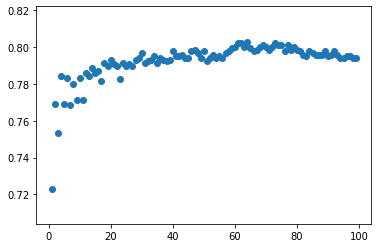

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
accuracy = []
for i in range(1,100):
    forest = RandomForestClassifier(n_estimators = i, random_state = 0)
    forest.fit(X_train,y_train)
    accuracy.append(forest.score(X_test,y_test))
#print ("L' accuracy del TEST è del ",forest.score(X_test,y_test))
#print("la MAE è: ", mean_absolute_error(y_test,forest.predict(X_test)))
plt.scatter(np.arange(1,len(accuracy)+1),accuracy)
#print (np.max(accuracy))
max_accuracy = np.max(accuracy)
max_index = 0
for j in range(0,len(accuracy)):
    
    if(accuracy[j]== max_accuracy):
        max_index=j
print ("L'accuracy massima è con :",max_index, "estimatori")
print ("L'accuracy massima è :",max_accuracy)

L'accuracy massima è a profondità : 6
L'accuracy massima è : 0.8012422360248447


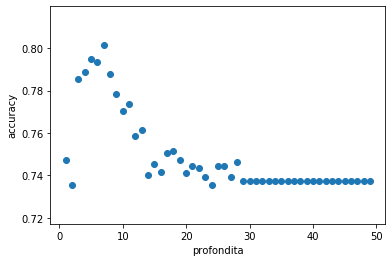

In [18]:
from sklearn.tree import DecisionTreeClassifier as DT
depth = []
for i in range(1,50):
    tree = DT(criterion= 'entropy',max_depth = i, random_state = 0)
    tree.fit(X_train,y_train)
    #print ("L'accuratezza sul training con profondità ", i," è :",tree.score(X_train,y_train))
    #print ("L'accuratezza sul test con profondità ",i, "è :",tree.score(X_test,y_test))
    #print("la MAE a profondità",i," è: ", mean_absolute_error(y_test,tree.predict(X_test)))
    depth.append(tree.score(X_test,y_test))

plt.scatter(np.arange(1,len(depth)+1),depth)
plt.xlabel('profondita')
plt.ylabel("accuracy")
max_accuracy_DT = np.max(depth)
max_index_DT = 0
for j in range(0,len(depth)):
    
    if(depth[j]== max_accuracy_DT):
        max_index_DT=j
print ("L'accuracy massima è a profondità :",max_index_DT)
print ("L'accuracy massima è :",max_accuracy_DT)

In [1]:
!pip freeze > requirements.txt